In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# 0.导入数据

In [2]:
cols=['user_id','order_date','order_products','order_amount']
df = pd.read_table('CDNOW.txt',names = cols,sep='\s+')
df.head()

,user_id,order_date,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
df.info()   #没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_date        69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.describe()

,user_id,order_date,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


# 1.商品静态分析

# 1.1各订单，购买数量、金额分析

In [5]:
df_pre = df.copy()  #备份一份原始数据
amount = df.groupby('order_amount').order_products.count().sort_values(ascending=False)  #这里以相同的购买金额为相同产品分组，对数量排序
amount

order_amount
11.77      2325
14.96      2027
13.97      1982
12.99      1406
14.37      1405
15.36      1403
12.49       953
14.99       866
13.99       733
11.49       728
19.99       604
14.49       543
15.49       524
10.77       494
14.79       471
12.77       446
15.96       440
23.54       410
9.77        393
12.97       382
25.98       374
9.49        366
24.98       357
9.99        342
9.98        334
13.77       325
11.88       318
25.74       301
6.79        289
15.99       289
           ... 
105.26        1
105.22        1
104.48        1
55.39         1
55.37         1
104.50        1
104.52        1
104.53        1
104.55        1
104.60        1
104.65        1
104.66        1
104.67        1
104.71        1
55.23         1
55.21         1
55.20         1
55.16         1
104.74        1
104.75        1
104.77        1
55.09         1
104.81        1
104.84        1
104.90        1
104.97        1
104.99        1
105.15        1
105.17        1
1286.01       1
Name: order

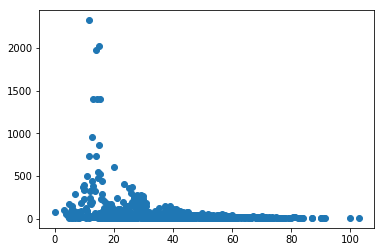

In [6]:
plt.scatter(amount.index[:1000],amount.iloc[:1000])   #取排序后前1000个商品，有点正态分布

# 2.商品动态分析

# 2.1订单数量、金额趋势分析

In [7]:
df.loc[:,['order_products','order_amount']].describe()

,order_products,order_amount
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


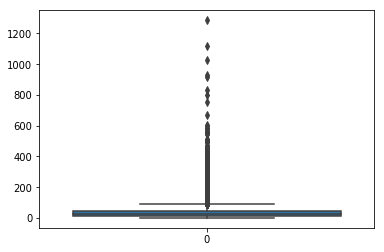

In [8]:
sb.boxplot(data=df['order_amount'])

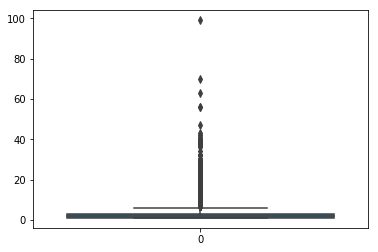

In [9]:
sb.boxplot(data=df['order_products'])

In [10]:
df2 = df.copy()
df2['order_date']=pd.to_datetime(df['order_date'],format='%Y%m%d')
df2['month']=df2['order_date'].values.astype('datetime64[M]')

df2.groupby('month')[['order_products','order_amount']].sum()

,order_products,order_amount
month,,
1997-01-01,19416,299060.17
1997-02-01,24921,379590.03
1997-03-01,26159,393155.27
1997-04-01,9729,142824.49
1997-05-01,7275,107933.30
1997-06-01,7301,108395.87
1997-07-01,8131,122078.88
1997-08-01,5851,88367.69
1997-09-01,5729,81948.80


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002886C293DD8>,
      dtype=object)

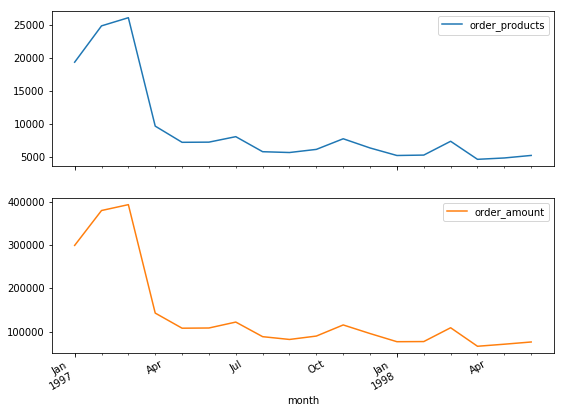

In [11]:
df2.groupby('month')[['order_products','order_amount']].sum().plot(kind='line',subplots=True,figsize=(9,7))  #价格和数量图一样的！

# 2.2异常值检测

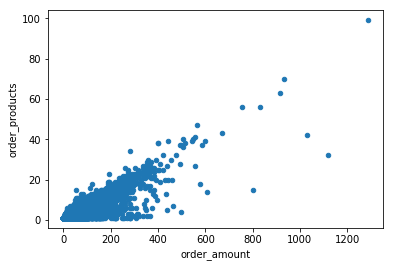

In [12]:
df.plot.scatter(y='order_products',x='order_amount')  

Text(0, 0.5, 'total_nums')

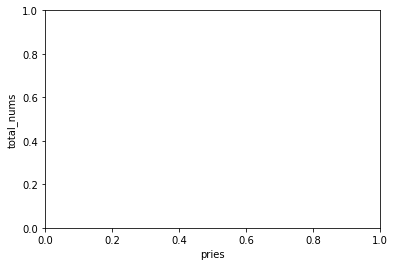

In [13]:
plt.scatter(amount.index,amount.values)
plt.xlabel('pries')
plt.ylabel('total_nums')   #没什么异常值

# 3.用户消费行为静态分析

# 3.1各用户购买数量分析

In [30]:
df.loc[:,['user_id','order_products','order_amount']].groupby('user_id').sum().sort_values(['order_products'],ascending=False)

,order_products,order_amount
user_id,,
14048,1033,8976.33
7592,917,13990.93
7983,536,6973.07
7931,514,6497.18
19339,378,6552.70
22279,330,4490.64
499,328,4378.55
6569,322,4968.00
3049,301,4262.85


In [38]:
user_maxproducts_id = df.loc[:,['user_id','order_products','order_amount']].groupby('user_id').sum().sort_values(['order_products'],ascending=False).index[0]

14048

In [31]:
df.loc[:,['user_id','order_products','order_amount']].groupby('user_id').sum().sort_values(['order_amount'],ascending=False)

,order_products,order_amount
user_id,,
7592,917,13990.93
14048,1033,8976.33
7983,536,6973.07
19339,378,6552.70
7931,514,6497.18
6569,322,4968.00
22279,330,4490.64
499,328,4378.55
3049,301,4262.85


In [40]:
user_maxamount_id = df.loc[:,['user_id','order_products','order_amount']].groupby('user_id').sum().sort_values(['order_amount'],ascending=False).index[0]
user_maxamount_id

7592

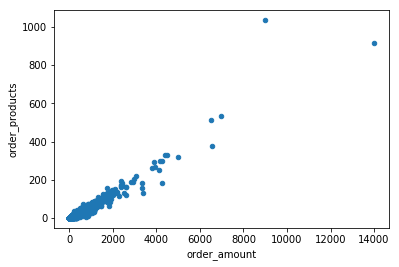

In [32]:
user_df = df.loc[:,['user_id','order_products','order_amount']].groupby('user_id').sum()
user_df.plot.scatter(y='order_products',x='order_amount')  

In [33]:
user_df.describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [55]:
df.loc[df.user_id == user_maxamount_id]   #最大消费金额用户个人分析

,user_id,order_date,order_products,order_amount
23562,7592,19970129,5,73.21
23563,7592,19970130,2,26.14
23564,7592,19970201,4,71.71
23565,7592,19970203,47,563.59
23566,7592,19970209,14,225.35
23567,7592,19970214,2,25.74
23568,7592,19970214,1,11.77
23569,7592,19970216,10,159.90
23570,7592,19970216,4,56.86
23571,7592,19970218,9,104.33


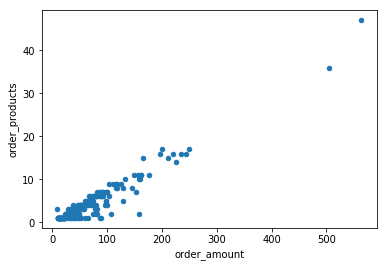

In [56]:
df.loc[df.user_id == user_maxamount_id].plot.scatter(y='order_products',x='order_amount')

In [57]:
df.loc[df.user_id == user_maxproducts_id]   #最大购买数量用户个人分析

,user_id,order_date,order_products,order_amount
42713,14048,19970219,1,4.79
42714,14048,19970224,1,4.79
42715,14048,19970226,1,9.98
42716,14048,19970228,1,15.36
42717,14048,19970228,1,4.79
42718,14048,19970306,3,24.35
42719,14048,19970313,7,55.29
42720,14048,19970314,5,58.87
42721,14048,19970316,3,23.55
42722,14048,19970318,4,24.55


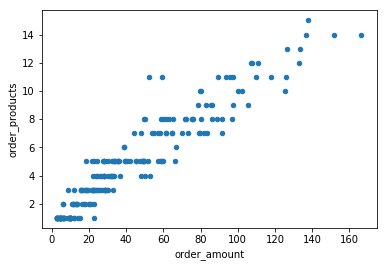

In [60]:
df.loc[df.user_id == user_maxproducts_id].plot.scatter(y='order_products',x='order_amount')

# 4.用户消费行为动态分析

# 4.1首次，最后一次购买时间

In [66]:
df2.groupby('month')['order_products','order_amount'].sum()

,order_products,order_amount
month,,
1997-01-01,19416,299060.17
1997-02-01,24921,379590.03
1997-03-01,26159,393155.27
1997-04-01,9729,142824.49
1997-05-01,7275,107933.30
1997-06-01,7301,108395.87
1997-07-01,8131,122078.88
1997-08-01,5851,88367.69
1997-09-01,5729,81948.80


In [61]:
df2.groupby('user_id')['month'].min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [62]:
df2.groupby('user_id')['month'].max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

# 4.2生命周期分析

In [79]:
order_date_min=df2.groupby('user_id').order_date.min()
order_date_max=df2.groupby('user_id').order_date.max()
(order_date_max - order_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_date, dtype: timedelta64[ns]

In [82]:
(order_date_max - order_date_min).value_counts().sort_values(ascending=False).head()   #当天购的人很多啊

0 days     12054
1 days        76
7 days        65
8 days        56
13 days       54
Name: order_date, dtype: int64

In [88]:
(order_date_max - order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

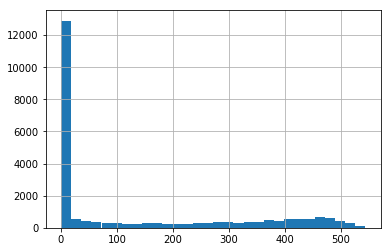

In [90]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=30)